In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import sweetviz as sv
import pygwalker as pw
import cv2
from gc import collect
from tqdm import tqdm
from pathlib import Path

import warnings; warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
root = Path.cwd().parent
data = root / 'training' / 'data'

In [3]:
df = pd.read_csv(data / 'train.csv')
df.head()

,name,family,phylum,order,genus,class,file_name,height,width,location_uncertainty,date,latitude,longitude,set,dataset,specific_epithet,image_dir_name,common_name,file_path,gcs_path,class_id,class_priors,norm_date
0,Herpothallon rubrocinctum,Arthoniaceae,Ascomycota,Arthoniales,Herpothallon,Arthoniomycetes,cbb41cb8edf3cfe364e4e3b083ab7a24.jpg,600,800,0.0,2016-08-02 00:00:00+00:00,28.367144,-81.437020,train,2018,rubrocinctum,Fungi_Ascomycota_Arthoniomycetes_Arthoniales_A...,NaN,Fungi_Ascomycota_Arthoniomycetes_Arthoniales_A...,gs://mush-img-repo/train/Fungi_Ascomycota_Arth...,185,0.003144,0.586301
1,Herpothallon rubrocinctum,Arthoniaceae,Ascomycota,Arthoniales,Herpothallon,Arthoniomycetes,755adc87e72ccb246b5b177efb0b8715.jpg,600,800,29.0,2015-10-24 00:00:00+00:00,28.367783,-81.436785,train,2018,rubrocinctum,Fungi_Ascomycota_Arthoniomycetes_Arthoniales_A...,NaN,Fungi_Ascomycota_Arthoniomycetes_Arthoniales_A...,gs://mush-img-repo/train/Fungi_Ascomycota_Arth...,185,0.003144,0.810959
2,Herpothallon rubrocinctum,Arthoniaceae,Ascomycota,Arthoniales,Herpothallon,Arthoniomycetes,0be8000dcc267e8538152788dd4a05fe.jpg,600,800,0.0,2016-12-22 00:00:00+00:00,28.300703,-81.453300,train,2018,rubrocinctum,Fungi_Ascomycota_Arthoniomycetes_Arthoniales_A...,NaN,Fungi_Ascomycota_Arthoniomycetes_Arthoniales_A...,gs://mush-img-repo/train/Fungi_Ascomycota_Arth...,185,0.003144,0.975342
3,Herpothallon rubrocinctum,Arthoniaceae,Ascomycota,Arthoniales,Herpothallon,Arthoniomycetes,e3199adcb85cdf4b66e0066a6957788a.jpg,600,800,0.0,2016-12-22 00:00:00+00:00,28.300703,-81.453300,train,2018,rubrocinctum,Fungi_Ascomycota_Arthoniomycetes_Arthoniales_A...,NaN,Fungi_Ascomycota_Arthoniomycetes_Arthoniales_A...,gs://mush-img-repo/train/Fungi_Ascomycota_Arth...,185,0.003144,0.975342
4,Herpothallon rubrocinctum,Arthoniaceae,Ascomycota,Arthoniales,Herpothallon,Arthoniomycetes,7fc01fe5971cc9d8a5e0ccd49fad91af.jpg,600,800,0.0,2016-07-20 00:00:00+00:00,28.360108,-81.210864,train,2018,rubrocinctum,Fungi_Ascomycota_Arthoniomycetes_Arthoniales_A...,NaN,Fungi_Ascomycota_Arthoniomycetes_Arthoniales_A...,gs://mush-img-repo/train/Fungi_Ascomycota_Arth...,185,0.003144,0.550685


In [4]:
df = df[['height', 'width', 'location_uncertainty', 'norm_date', 'class_priors', 'latitude', 'longitude', 'set', 'dataset', 'class_id']]
sv.analyze(df).show_html('eda.html')

                                             |          | [  0%]   00:00 -> (? left)

Report eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [5]:
print(df[df['set'] == 'train']['class_id'].value_counts())
#print(df[df['set'] == 'val']['class_id'].value_counts())

class_id
22     633
432    527
373    427
105    419
231    379
      ... 
36       9
294      9
446      9
372      8
239      7
Name: count, Length: 467, dtype: int64


<Axes: ylabel='count'>

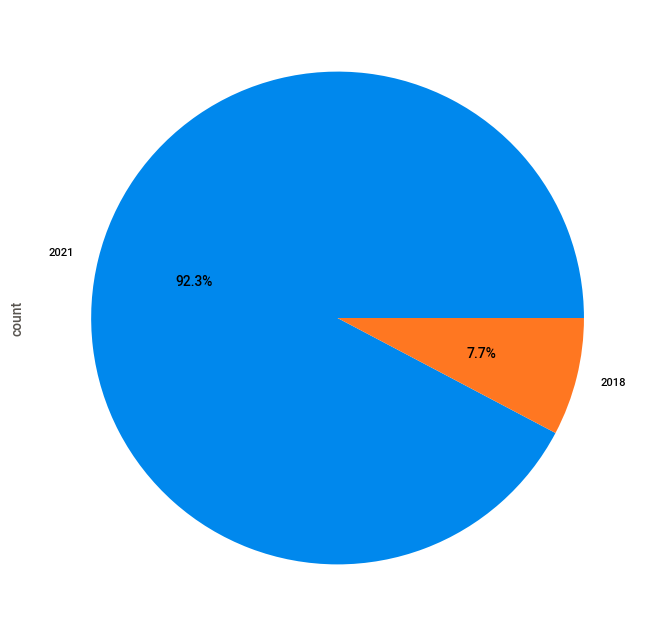

In [6]:
df['dataset'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))

In [9]:
df

,height,width,location_uncertainty,norm_date,class_priors,latitude,longitude,set,dataset,class_id
0,600,800,0.0,0.586301,0.003144,28.367144,-81.437020,train,2018,185
1,600,800,29.0,0.810959,0.003144,28.367783,-81.436785,train,2018,185
2,600,800,0.0,0.975342,0.003144,28.300703,-81.453300,train,2018,185
3,600,800,0.0,0.975342,0.003144,28.300703,-81.453300,train,2018,185
4,600,800,0.0,0.550685,0.003144,28.360108,-81.210864,train,2018,185
...,...,...,...,...,...,...,...,...,...,...
101280,375,500,13.0,0.356164,0.003422,53.622730,35.868820,val,2021,435
101281,375,500,44.0,0.435616,0.003422,-37.643600,143.641740,val,2021,435
101282,341,500,197.0,0.454795,0.003422,42.480230,-83.198750,val,2021,435
101283,500,410,15.0,0.769863,0.003422,45.589260,-78.370990,val,2021,435


In [8]:
sns.histplot

<function seaborn.distributions.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)>